In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(0)

In [3]:
# Valores espaciados uniformemente dentro de un intervalo determinado
x = np.arange(-1,1,0.1)
x

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

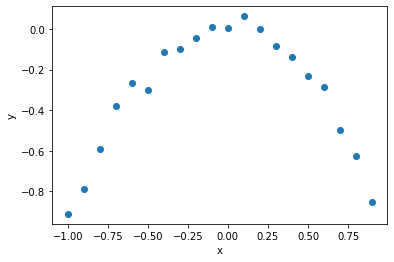

In [4]:
y = -x**2 + np.random.normal(0,0.05,len(x))
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
X_train = x[0:12]
y_train = y[0:12]
X_test = x[12:]
y_test = y[12:]

Ahora, crearemos una función que, dado el conjunto de entrenamiento y el grado de un polinomio, devuelva una función que represente la expresión matemática del polinomio que mejor se ajusta a los datos de entrenamiento.

In [8]:
def polynomial_fit(degree = 1):
    return np.poly1d(np.polyfit(X_train,y_train,degree))

Por otro lado, la siguiente función permite representar gráficamente el conjunto de datos y el polinomio que mejor se ajuste a un grado específico.

In [9]:
def plot_polyfit(degree = 1):
    p = polynomial_fit(degree)
    plt.scatter(X_train,y_train,label="Training set")
    plt.scatter(X_test,y_test,label="Test set")
    curve_x = np.arange(min(x),max(x),0.01)
    plt.plot(curve_x,p(curve_x),label="Polynomial of degree{}".format(degree))
    plt.xlim((-1,1))
    plt.ylim((-1,np.max(y)+0.1))

    plt.legend()
    plt.plot()

¿Qué ocurre con un polinomio de grado 1?

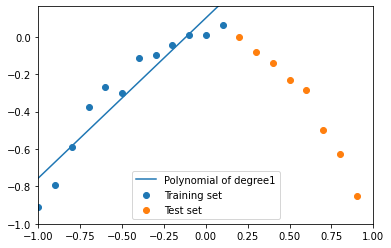

In [10]:
plot_polyfit(1) 

Un polinomio de grado 1 se ajusta mejor a los datos de entrenamiento que a los datos de test, aunque todavía podría ajustarse más. Podríamos decir que el modelo no está aprendiendo adecuadamente del entrenamiento, por lo que no es bueno.

Y ahora, ¿qué ocurre con un polinomio de grado 7?

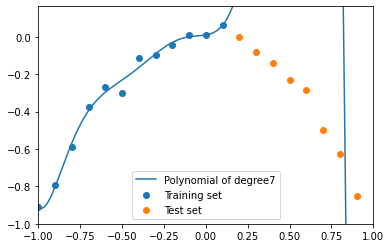

In [11]:
plot_polyfit(7)

Como puede observarse, el polinomio se ajusta muy bien a los puntos de entrenamiento, pero es completamente incorrecto para los datos de test.

Por tanto, un grado más alto parece conducir a un sobreajuste de los datos de entrenamiento y a una baja precisión en los datos de prueba. Cuanto mayor sea el grado de un polinomio, mayor será el número de parámetros involucrados en el proceso de aprendizaje, por lo que un polinomio de alto grado es un modelo más complejo que uno de bajo grado.

Veamos, por último, que ocurre con un polinomio de grado 11:

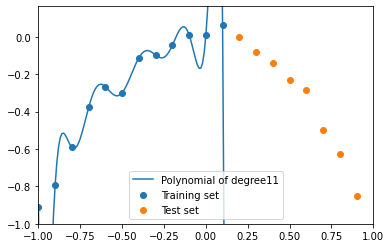

In [12]:
plot_polyfit(11)

Ya no hay dudas. El polinomio se ajusta perfectamente a los datos de entrenamiento, pero ni siquiera se acerca a los datos de test. Por lo tanto, cuanto mayor sea el grado del polinomio, mayor será la precisión de interpolación en los datos de entrenamiento y menor será el rendimiento en los datos de test.

***¿Cómo evitar el sobreajuste?***

Para el ejemplo anterior, recorremos todos los grados y calculamos el RMSE para los conjuntos de entrenamiento y pruebas:

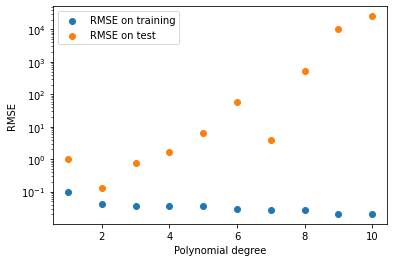

In [17]:
results = []

for i in range(1, len(X_train)-1):
    
    p = polynomial_fit(i)
    rmse_training = np.sqrt(mean_squared_error(y_train,p(X_train)))
    rmse_test = np.sqrt(mean_squared_error(y_test,p(X_test)))
    results.append({'degree': i,
                    'rmse_training': rmse_training,
                    'rmse_test': rmse_test})
    
plt.scatter([x['degree'] for x in results],[x['rmse_training'] for x in results],label="RMSE on training")
plt.scatter([x['degree'] for x in results],[x['rmse_test'] for x in results],label="RMSE on test")
plt.yscale("log")
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")
plt.legend()
plt.show()

Obtenemos el valor más bajo del conjunto de pruebas RMSE si elegimos un polinomio de grado 2, que es el modelo del que se muestrean nuestros datos.

Veamos, por tanto, cómo quedaría este modelo:

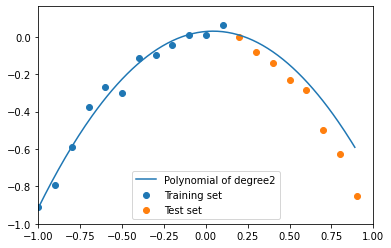

In [18]:
plot_polyfit(2)

***Conclusión:***

Si queremos generalizar los fenómenos subyacentes que dieron origen a nuestros datos, debemos validar nuestro modelo en un conjunto de datos en el que no se haya entrenado. Solo de esta manera podemos estar seguros de evitar el sobreajuste.

Referencia: https://towardsdatascience.com/an-example-of-overfitting-and-how-to-avoid-it-f6739e67f394